In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
# import utils
import cv2
import numpy as np
from collections import Counter
import colorsys
from PIL import ImageEnhance
from PIL import Image

In [2]:
import colorsys

class Color:
    def __init__(self,RGB,HLS,HSV):
        self.RGB = RGB
        self.HLS = HLS
        self.HSV = HSV

def Normalize(Value,Min,Max):
    Output = Value
    if Value > Max:
        Output = Max
    elif Value < Min:
        Output = Min
    return Output

def complementaryColor(ColorInput):
    # Convert RGB (base 256) to HLS (between 0 and 1 )
    ColorInput.HLS = list(colorsys.rgb_to_hls(ColorInput.RGB[0] / 255, ColorInput.RGB[1] / 255, ColorInput.RGB[2] / 255))

    # Change the Hue value to the Hue opposite
    HueValue = ColorInput.HLS[0] * 360
    ColorInput.HLS[0] = ((HueValue + 180) % 360)/360

    # Convert HLS (between 0 and 1) to RGB (base 256)
    return list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorInput.HLS[0],ColorInput.HLS[1],ColorInput.HLS[2])))

def triadicColor(ColorInput):

    # Convert RGB (base 256) to HLS (between 0 and 1 )
    ColorInput.HLS = list(colorsys.rgb_to_hls(ColorInput.RGB[0] / 255, ColorInput.RGB[1] / 255, ColorInput.RGB[2] / 255))

    # Find the first triadic Hue
    FirstTriadicHue = ((ColorInput.HLS[0] * 360 + 120) % 360) / 360

    # Find the second triadic Hue
    SecondTriadicHue = ((ColorInput.HLS[0] * 360 + 240) % 360) / 360

    ColorOutput1 = Color("",[FirstTriadicHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")
    ColorOutput2 = Color("",[SecondTriadicHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")

    ColorOutput1.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput1.HLS[0],ColorOutput1.HLS[1],ColorOutput1.HLS[2])))
    ColorOutput2.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput2.HLS[0],ColorOutput2.HLS[1],ColorOutput2.HLS[2])))

    return [ColorOutput1.RGB,ColorOutput2.RGB]

def splitComplementaryColor(ColorInput):
    # Convert RGB (base 256) to HLS (between 0 and 1 )
    ColorInput.HLS = list(colorsys.rgb_to_hls(ColorInput.RGB[0] / 255, ColorInput.RGB[1] / 255, ColorInput.RGB[2] / 255))

    # Find the first triadic Hue
    FirstSplitComplementaryHue = ((ColorInput.HLS[0] * 360 + 150) % 360) / 360

    # Find the second triadic Hue
    SecondSplitComplementaryHue = ((ColorInput.HLS[0] * 360 + 210) % 360) / 360

    ColorOutput1 = Color("",[FirstSplitComplementaryHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")
    ColorOutput2 = Color("",[SecondSplitComplementaryHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")

    ColorOutput1.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput1.HLS[0],ColorOutput1.HLS[1],ColorOutput1.HLS[2])))
    ColorOutput2.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput2.HLS[0],ColorOutput2.HLS[1],ColorOutput2.HLS[2])))

    return [ColorOutput1.RGB,ColorOutput2.RGB]

def tetradicColor(ColorInput):

    # Convert RGB (base 256) to HLS (between 0 and 1 )
    ColorInput.HLS = list(colorsys.rgb_to_hls(ColorInput.RGB[0] / 255, ColorInput.RGB[1] / 255, ColorInput.RGB[2] / 255))

    # Find the first tetradic Hue
    FirstTetradicHue = ((ColorInput.HLS[0] * 360 + 60) % 360) / 360

    # Find the second tetradic Hue
    SecondTetradicHue = ((ColorInput.HLS[0] * 360 + 180) % 360) / 360

    # Find the third tetradic Hue
    ThirdTetradicHue = ((ColorInput.HLS[0] * 360 + 240) % 360) / 360


    ColorOutput1 = Color("",[FirstTetradicHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")
    ColorOutput2 = Color("",[SecondTetradicHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")
    ColorOutput3 = Color("",[ThirdTetradicHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")

    ColorOutput1.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput1.HLS[0],ColorOutput1.HLS[1],ColorOutput1.HLS[2])))
    ColorOutput2.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput2.HLS[0],ColorOutput2.HLS[1],ColorOutput2.HLS[2])))
    ColorOutput3.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput3.HLS[0],ColorOutput3.HLS[1],ColorOutput3.HLS[2])))

    return [ColorOutput1.RGB,ColorOutput2.RGB,ColorOutput3.RGB]

def analogousColor(ColorInput):
    # Convert RGB (base 256) to HLS (between 0 and 1 )
    ColorInput.HLS = list(colorsys.rgb_to_hls(ColorInput.RGB[0] / 255, ColorInput.RGB[1] / 255, ColorInput.RGB[2] / 255))

    # Find the first analogous Hue
    FirstAnalogousHue = ((ColorInput.HLS[0] * 360 + 30) % 360) / 360

    # Find the second analogous Hue
    SecondAnalogousHue = ((ColorInput.HLS[0] * 360 - 30) % 360) / 360

    ColorOutput1 = Color("",[FirstAnalogousHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")
    ColorOutput2 = Color("",[SecondAnalogousHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")

    ColorOutput1.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput1.HLS[0],ColorOutput1.HLS[1],ColorOutput1.HLS[2])))
    ColorOutput2.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput2.HLS[0],ColorOutput2.HLS[1],ColorOutput2.HLS[2])))

    return [ColorOutput1.RGB,ColorOutput2.RGB]

def monochromaticColor(ColorInput):
    # Convert RGB (base 256) to HSV (between 0 and 1)
    ColorInput.HSV = list(colorsys.rgb_to_hsv(ColorInput.RGB[0] / 255, ColorInput.RGB[1] / 255, ColorInput.RGB[2] / 255))

    # Generate 10 monochromatic colors with a step of 5%
    increment = [0,0.05,0.10]
    result = []
    output = []
    for x in increment:
        for y in increment:
            result.append(list(map(lambda x: Normalize(round(x * 255),0,255), colorsys.hsv_to_rgb(ColorInput.HSV[0],Normalize(ColorInput.HSV[1],0,100) + x,Normalize(ColorInput.HSV[2] + y,0,100)))))
            result.append(list(map(lambda x: Normalize(round(x * 255),0,255), colorsys.hsv_to_rgb(ColorInput.HSV[0],Normalize(ColorInput.HSV[1],0,100) - x,Normalize(ColorInput.HSV[2] - y,0,100)))))
    [output.append(x) for x in result if x not in output]
    return output

import matplotlib.pyplot as plt
import numpy as np

def rgb_to_hex(color):
    r, g, b = color
    return ('#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)).upper()

def make_palette(colors):
    cnt = len(colors)
    array = np.zeros([100, 100*cnt, 3], dtype=np.uint8)
    hex_code = []
    for i in range(1, cnt+1):
        if i == 1:
            array[:,:100] = colors[i-1]
            hex_code.append(rgb_to_hex(colors[i-1]))
        else:
            array[:,100*(i-1):] = colors[i-1]
            hex_code.append(rgb_to_hex(colors[i-1]))
            
    plt.figure(figsize=(10*cnt,2))
    for i, code in enumerate(hex_code):
        plt.text(15+100*i,55,code, fontsize=15)
    plt.imshow(array)
    plt.show()
    
    return array

In [9]:
def quantization(image,n_clusters):
    w, h, _ = image.shape
    print('cluster_to_',n_clusters)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    clt = KMeans(n_clusters = n_clusters)
    clt = clt.fit(image)
    center = clt.cluster_centers_.astype("uint8")
   
    img = center[clt.labels_]    
    img = img.reshape((w, h, 3)).astype("uint8")
    #img[np.where((edge_image==(0,0,0)).all(axis=-1))] = (0,0,0) 
    return clt,img

def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

def color_clustering(hist, centroids,n_clusters):
    centroids = centroids.astype("uint8").tolist() 
    colorDic = {p : c for p, c in zip(hist, centroids)} #{"사용비율 : 색깔"}
    colorDic = sorted(colorDic.items(), key=lambda x:x[0], reverse=True)
   
    #flag = np.empty((1,n_clusters,3), dtype=np.uint8) 
    i = 0
    per=[]
    hsv =[]
    for (percent, color) in colorDic: 
        a = colorsys.rgb_to_hsv(color[0],color[1],color[2]) #hsv로 저장   
        hsv.append(list(a))
        per.append(round(percent,2)) 
        #flag[0,i,:] = color
        i+=1   
       
    return per,hsv #사용비율, hsv


def colorextract(img,c_num):
    sample = cv2.imread(img)
    sample = sample[60:1360, 170:1470]
    plt.imshow(sample)
    plt.show()
    sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
    sample = cv2.resize(sample, dsize=(512, 512), interpolation=cv2.INTER_AREA)
    sample[np.where((sample>=(230,230,230)).all(axis=-1))] = (255,255,255) 
    
    #채도 조정
    hsv = cv2.cvtColor(sample,cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*1.2
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
   
    hsv = np.array(hsv, dtype = np.uint8)
    image=cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    
    out = np.ones_like(image) *255
    mask = np.ones((512,512), dtype='uint8') * 0
    cv2.circle(mask, (256, 256), 255, 3, -1)
    cv2.grabCut(image ,mask,None,None,None,3,cv2.GC_INIT_WITH_MASK)
    out[np.where((mask==3))] = image[np.where((mask==3))]
  
#     cv2.imwrite('out.jpg', cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
   
    
    #대비 높임
#     lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB) 
#     l, a, b = cv2.split(lab) 
#     clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=(8, 8)) 
#     cl = clahe.apply(l) 
#     limg = cv2.merge((cl, a, b)) 
#     image = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    
    #만다라부분 crop -> 흰배경에 붙임
   
    
    CLUSTER = c_num
    clt,final = quantization(out, CLUSTER)
    hist = centroid_histogram(clt)
    hist = hist.astype("float")

    per,hsv = color_clustering(hist, clt.cluster_centers_,CLUSTER) #많이 쓰인 순서대로 나옴
    hsvlist = list(zip(per, hsv))
    hsvlist=sorted(hsvlist, key = lambda x: (x[0]),reverse=True) #채도 명도 곱한거 기준으로 내림차순, 혹시 같은 값이면 칠해진 부분이 많은 순서 #x[1][2]*x[1][1]

    rgblist=[]
    graylist = []
    for per,color in hsvlist:
        if (color[1]<0.13 and color[2]<=150) or (color[1]<0.1 and color[2]>=250):
            print('g',color,per)
            g = colorsys.hsv_to_rgb(color[0],color[1],color[2])
            g = list(g)
            graylist.append((g,per))
            
        else:
            a = colorsys.hsv_to_rgb(color[0],color[1],color[2])
            a = list(a)
            print('a',color,per)
            rgblist.append((a,per))
                    
    return rgblist, graylist

def show(colors):
    clist = colors
    flag = np.empty((1,len(clist),3), dtype=np.uint8) 
    i = 0
#     if len(clist)<17:
#         clist[len(clist):17]=[[255,255,255]]*(17-len(clist))
    for rgb in clist:
        flag[0,i,:] = rgb
        i+=1
    plt.axis("off")
    plt.imshow(flag)

In [229]:
import os
import pandas as pd
dir_path = './coloring_result'
path = os.listdir('./coloring_result')
path = [i for i in path if 'jpg' in i]
cnum_list = []
path

['KCW_0.jpg',
 'KCW_1.jpg',
 'KJS_1.jpg',
 'PSM_0.jpg',
 'YWR_0.jpg',
 'KTH_1.jpg',
 'KTH_0.jpg',
 'OSL_1.jpg',
 'OSL_0.jpg',
 'PSM_1.jpg',
 'OKT_1.jpg',
 'YJY_1.jpg',
 'LSE_0.jpg',
 'YWR_1.jpg',
 'OKT_0.jpg',
 'HJN_1.jpg',
 'JNY_0.jpg',
 'YJY_0.jpg',
 'LJH_0.jpg',
 'CJG_0.jpg',
 'LHN_1.jpg',
 'LSE_1.jpg',
 'LJH_1.jpg',
 'JNY_1.jpg',
 'LHN_0.jpg',
 'LSH_0.jpg',
 'LSH_1.jpg',
 'CJG_1.jpg',
 'HJN_0.jpg',
 'KJS_0.jpg']

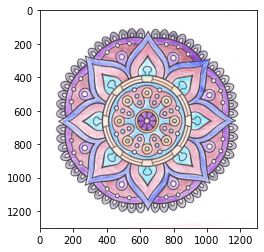

cluster_to_ 8
g [0.0, 0.0, 254] 0.47
a [0.7297297297297297, 0.1581196581196581, 234] 0.13
a [0.8541666666666666, 0.1951219512195122, 82] 0.1
a [0.7282608695652174, 0.22439024390243903, 205] 0.1
a [0.8333333333333334, 0.14285714285714285, 133] 0.06
a [0.09583333333333333, 0.3225806451612903, 248] 0.06
a [0.03144654088050314, 0.43621399176954734, 243] 0.04
a [0.8974358974358975, 0.4642857142857143, 224] 0.04


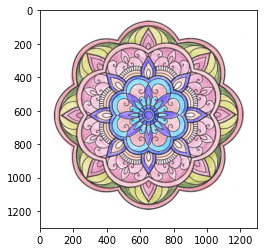

cluster_to_ 10
g [0.0, 0.0, 254] 0.47
a [0.7195121951219513, 0.16942148760330578, 242] 0.12
a [0.7230392156862745, 0.2982456140350877, 228] 0.09
a [0.7068965517241379, 0.27884615384615385, 104] 0.07
a [0.9215686274509804, 0.23943661971830985, 71] 0.05
a [0.5933333333333334, 0.18796992481203006, 133] 0.05
a [0.5057471264367815, 0.38666666666666666, 225] 0.04
a [0.6551724137931035, 0.1657142857142857, 175] 0.04
a [0.0, 0.5238095238095238, 231] 0.03
a [0.11063218390804597, 0.46963562753036436, 247] 0.03


In [10]:
clist_0,glist_0 = colorextract('./coloring_result/HWJ_0.jpg',8) 
clist_1,glist_1 = colorextract('./coloring_result/HWJ_1.jpg',10) 

0.53
7
[[210, 197, 234], [82, 66, 80], [176, 159, 205], [133, 114, 133], [248, 214, 168], [243, 157, 137], [224, 120, 183]]
[0.245, 0.189, 0.189, 0.113, 0.113, 0.075, 0.075]


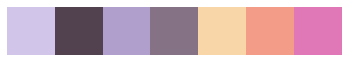

In [11]:
# print(clist_0)
clist_color_0 = [[int(c) for c in i[0]] for i in clist_0]
# print('--------------------------------------------')
# print(clist_color_0)
show(clist_color_0)

ratio_sum = 0
new_clist_0 = []

for i in clist_0 :
    ratio_sum += i[1]
print(ratio_sum)

for i in clist_0 : 
    new_clist_0.append((i[0], i[1]/ratio_sum))

new_clist_0 = [([int(c) for c in i[0]], round(i[1],3)) for i in new_clist_0]
print(len(new_clist_0))

ratio_list = [i[1]  for i in new_clist_0]
print(clist_color_0)
print(ratio_list)
# print(new_clist_0)

0.52
9
[[214, 201, 242], [183, 160, 228], [82, 75, 104], [71, 54, 62], [108, 118, 133], [138, 222, 225], [146, 148, 175], [231, 110, 110], [247, 208, 131]]
[0.231, 0.173, 0.135, 0.096, 0.096, 0.077, 0.077, 0.058, 0.058]


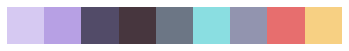

In [12]:
# print(clist_1)
clist_color_1 = [[int(c) for c in i[0]] for i in clist_1]
# print('--------------------------------------------')
# print(clist_color_1)
show(clist_color_1)

ratio_sum = 0
new_clist_1 = []

for i in clist_1 :
    ratio_sum += i[1]
print(ratio_sum)

for i in clist_1 : 
    new_clist_1.append((i[0], i[1]/ratio_sum))

new_clist_1 = [([int(c) for c in i[0]], round(i[1],3)) for i in new_clist_1]
print(len(new_clist_1))
ratio_list = [i[1]  for i in new_clist_1]
print(clist_color_1)
print(ratio_list)


# print(new_clist_1)

[([254, 254, 254], 0.76), ([96, 94.0, 91.0], 0.04), ([66.0, 61.0, 67], 0.04), ([137, 130.0, 136.0], 0.02)]
[[254, 254, 254], [96, 94, 91], [66, 61, 67], [137, 130, 136]]
[254, 254, 254]
[96, 94, 91]
[66, 61, 67]
[137, 130, 136]


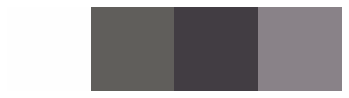

In [146]:
print(glist)
glist_color = [[int(c) for c in i[0]] for i in glist]
print(glist_color)
show(glist_color)

In [107]:
def make_palette_1(colors):
    cnt = len(colors)
    array = np.zeros([1, 1*cnt, 3], dtype=np.uint8)
    hex_code = []
    for i in range(1, cnt+1):
        if i == 1:
            array[:,:1] = colors[i-1]
            hex_code.append(rgb_to_hex(colors[i-1]))
        else:
            array[:,1*(i-1):] = colors[i-1]
            hex_code.append(rgb_to_hex(colors[i-1]))
            
    plt.figure(figsize=(10*cnt,2))
#     for i, code in enumerate(hex_code):
#         plt.text(15+100*i,55,code, fontsize=15)
    plt.imshow(array)
    plt.show()
    
    return array

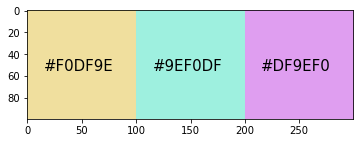

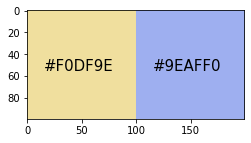

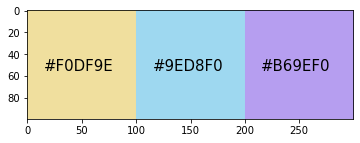

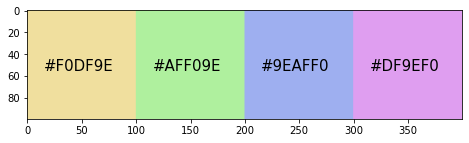

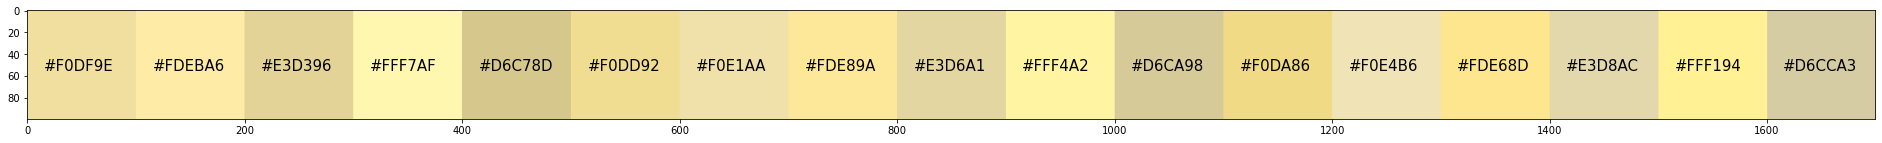

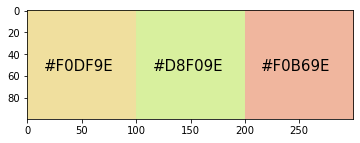

In [95]:
color = [int(c) for c in clist[4]]

Cyan = Color(color,"","")
test = triadicColor(Cyan)
test = [color]+test
p1 = make_palette(test)

test2 = complementaryColor(Cyan)
test2 = [color]+[test2]
p2 = make_palette(test2)

test3 = splitComplementaryColor(Cyan)
test3 = [color]+test3
p3 = make_palette(test3)

test4 = tetradicColor(Cyan)
test4 = [color]+test4
p4 = make_palette(test4)

Cyan = Color(color,"","")
test5 = monochromaticColor(Cyan)
p5 = make_palette(test5)

test6 = analogousColor(Cyan)
test6 = [color]+test6
p6 = make_palette(test6)

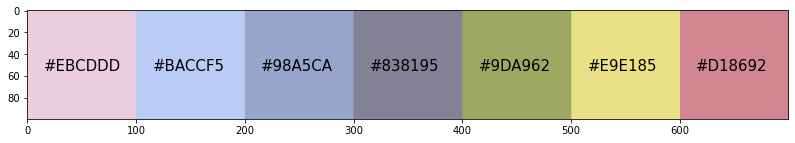

In [39]:
usr_pal =  make_palette(clist)

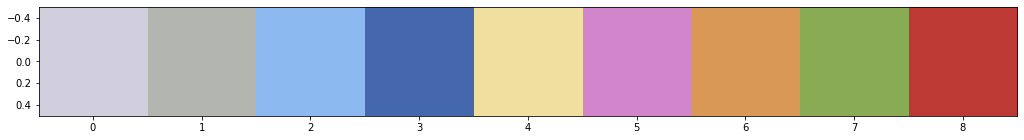

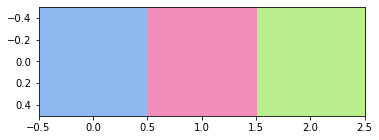

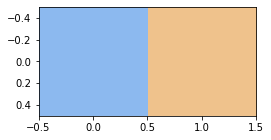

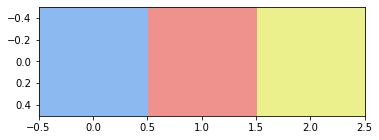

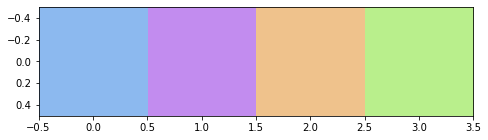

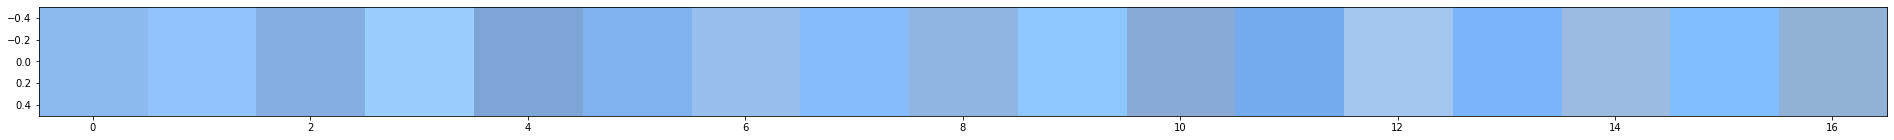

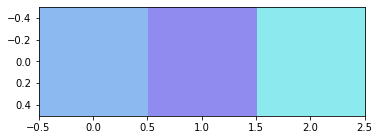

In [121]:
usr_pal_small =  make_palette_1(clist)

color = [int(c) for c in clist[2]]

Cyan = Color(color,"","")
test = triadicColor(Cyan)
test = [color]+test
p1_small = make_palette_1(test)

test2 = complementaryColor(Cyan)
test2 = [color]+[test2]
p2_small = make_palette_1(test2)

test3 = splitComplementaryColor(Cyan)
test3 = [color]+test3
p3_small = make_palette_1(test3)

test4 = tetradicColor(Cyan)
test4 = [color]+test4
p4_small = make_palette_1(test4)

Cyan = Color(color,"","")
test5 = monochromaticColor(Cyan)
p5_small = make_palette_1(test5)

test6 = analogousColor(Cyan)
test6 = [color]+test6
p6_small = make_palette_1(test6)


color_formula = [p1_small, p2_small, p3_small, p4_small, p5_small, p6_small]

In [109]:
hist = cv2.calcHist([usr_pal_small],[2],None,[256],[0,256])
hist1 = cv2.calcHist([p1],[2],None,[256],[0,256])

In [123]:
for p in color_formula :
    print('-----------------------------------')
    for c in range(3) :
        H1 = cv2.calcHist([usr_pal_small],[c],None,[256],[0,256])
        H2 = cv2.calcHist([p],[c],None,[256],[0,256])
        
        
        ## correlation, intersection : 값이 클수록 유사한것
        # chi-square, bhattacharyya : 값이 작을수록 유사한것 
        d1 = cv2.compareHist(H1,H2,cv2.HISTCMP_CORREL)
        d2 = cv2.compareHist(H1,H2,cv2.HISTCMP_CHISQR)
        d3 = cv2.compareHist(H1,H2,cv2.HISTCMP_INTERSECT)
        d4 = cv2.compareHist(H1,H2,cv2.HISTCMP_BHATTACHARYYA)

        print(c)
        print('df(H1,H2,CORREL)=',d1)
        print('df(H1,H2,CHISQR)=',d2)
        print('df(H1,H2,INTERSECT)=',d3)
        print('df(H1,H2,BHATTACHARYYA)=',d4)
        print('-----------------------------------')

-----------------------------------
0
df(H1,H2,CORREL)= 0.15894099558714375
df(H1,H2,CHISQR)= 8.0
df(H1,H2,INTERSECT)= 1.0
df(H1,H2,BHATTACHARYYA)= 0.8986378081686329
-----------------------------------
1
df(H1,H2,CORREL)= 0.1762969760318347
df(H1,H2,CHISQR)= 8.0
df(H1,H2,INTERSECT)= 1.0
df(H1,H2,BHATTACHARYYA)= 0.8986378081686329
-----------------------------------
2
df(H1,H2,CORREL)= 0.15894099558714375
df(H1,H2,CHISQR)= 8.0
df(H1,H2,INTERSECT)= 1.0
df(H1,H2,BHATTACHARYYA)= 0.8986378081686329
-----------------------------------
-----------------------------------
0
df(H1,H2,CORREL)= 0.20191400146659902
df(H1,H2,CHISQR)= 8.0
df(H1,H2,INTERSECT)= 1.0
df(H1,H2,BHATTACHARYYA)= 0.8742412365042523
-----------------------------------
1
df(H1,H2,CORREL)= 0.22396253241997538
df(H1,H2,CHISQR)= 8.0
df(H1,H2,INTERSECT)= 1.0
df(H1,H2,BHATTACHARYYA)= 0.8742412365042523
-----------------------------------
2
df(H1,H2,CORREL)= 0.20191400146659902
df(H1,H2,CHISQR)= 8.0
df(H1,H2,INTERSECT)= 1.0
df(H1,H